In [1]:
import numpy as np
import pandas as pd
import csv
low_memory=False
%matplotlib inline


In [2]:
colunas = ['competência','saldomovimentação','seção','graudeinstrução', 'idade', 'sexo','tipomovimentação','salário','raçacor']

janeiro21 = pd.read_csv('C:/Users/User/Desktop/bases_de_dados/CAGEDMOV202101.txt',delimiter=';', usecols=colunas)
fevereiro21 = pd.read_csv('C:/Users/User/Desktop/bases_de_dados/CAGEDMOV202102.txt',delimiter=';', usecols=colunas)
marco21 = pd.read_csv('C:/Users/User/Desktop/bases_de_dados/CAGEDMOV202103.txt',delimiter=';', usecols=colunas)
abril21 = pd.read_csv('C:/Users/User/Desktop/bases_de_dados/CAGEDMOV202104.txt',delimiter=';', usecols=colunas)

movimentacao = pd.concat([janeiro21,fevereiro21, marco21, abril21]) 


             

In [3]:
movimentacao.sample(10)

,competência,seção,saldomovimentação,graudeinstrução,idade,raçacor,sexo,tipomovimentação,salário
1106148,202101,F,1,5,29.0,1,1,20,1562.699951
2974447,202102,I,1,7,47.0,1,3,20,1313.520020
1804051,202104,C,-1,7,41.0,6,1,43,1665.040039
2550825,202102,J,1,9,48.0,3,1,20,8000.000000
1275032,202104,C,-1,7,25.0,3,3,40,1311.199951
1732776,202104,F,1,7,28.0,3,3,20,2200.000000
1971971,202102,G,1,7,29.0,6,3,20,1461.000000
146005,202101,N,-1,9,32.0,3,1,31,0.000000
2794211,202102,G,1,7,20.0,3,1,20,1200.000000
628412,202103,N,1,7,32.0,1,3,20,2212.129883


In [4]:
movimentacao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11640789 entries, 0 to 2642598
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   competência        int64  
 1   seção              object 
 2   saldomovimentação  int64  
 3   graudeinstrução    int64  
 4   idade              float64
 5   raçacor            int64  
 6   sexo               int64  
 7   tipomovimentação   int64  
 8   salário            float64
dtypes: float64(2), int64(6), object(1)
memory usage: 888.1+ MB


(Text(0, 0.5, 'Qtd (milhões)'),)

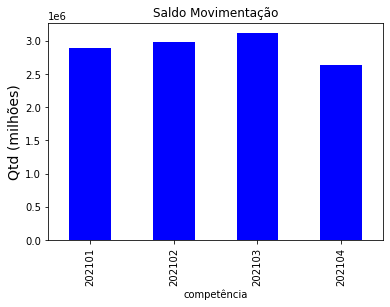

In [5]:
movimentacao.query('saldomovimentação != 0').groupby('competência').size().plot(kind='bar', color='BLUE',title = 'Saldo Movimentação').set_ylabel('Qtd (milhões)',fontsize=14),


In [6]:
movimentacao.query('saldomovimentação != 0').groupby('competência').size().sort_values(ascending=False)


competência
202103    3119136
202102    2987569
202101    2891485
202104    2642599
dtype: int64

In [7]:
troca_movimentacao = {10:'Admissão', 20:'Admissão', 25:'Admissão', 35:'Admissão', 70:'Admissão', 31:'Demissão', 32:'Demissão', 33:'Demissão', 40:'Demissão', 43:'Demissão', 45:'Demissão', 50:'Demissão', 60:'Demissão', 80:'Demissão', 90:'Demissão', 98:'Demissão', 99:'Não Identificado'}
movimentacao['tipomovimentação'] = movimentacao['tipomovimentação'].apply(lambda x: troca_movimentacao[x])

(Text(0, 0.5, 'Qtd (milhões)'),)

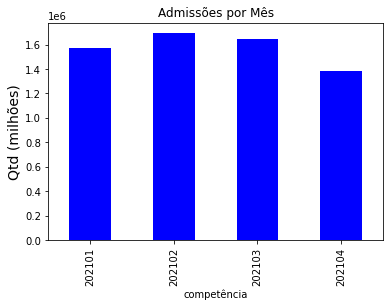

In [8]:
movimentacao.query('tipomovimentação == "Admissão"').groupby('competência').size().plot(kind='bar', color='BLUE',title = 'Admissões por Mês').set_ylabel('Qtd (milhões)',fontsize=14),


(Text(0, 0.5, 'Qtd (milhões)'),)

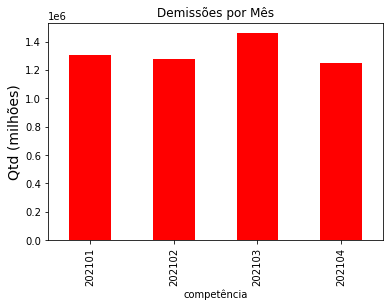

In [9]:
movimentacao.query('tipomovimentação == "Demissão"').groupby('competência').size().plot(kind='bar', color='RED',title = 'Demissões por Mês').set_ylabel('Qtd (milhões)',fontsize=14),


In [10]:
troca_sexo = {1:'Homem', 3:'Mulher', 9: 'Não Identificado'}
movimentacao['sexo'] = movimentacao['sexo'].apply(lambda x: troca_sexo[x])

(Text(0, 0.5, 'Qtd (milhões)'),)

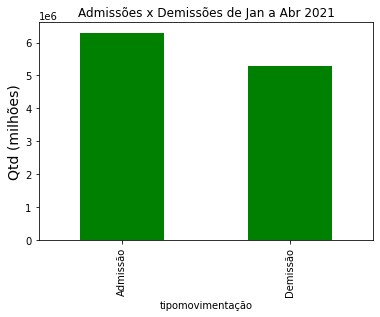

In [11]:
movimentacao.query('tipomovimentação != "Não Identificado"').groupby('tipomovimentação').size().plot(kind='bar', color='GREEN',title = 'Admissões x Demissões de Jan a Abr 2021').set_ylabel('Qtd (milhões)',fontsize=14),


(Text(0, 0.5, 'Qtd (milhões)'),)

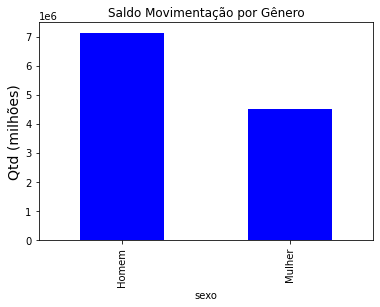

In [12]:
movimentacao.query('saldomovimentação != 0').groupby('sexo').size().sort_values(ascending=False).plot(kind='bar', color='BLUE',title = 'Saldo Movimentação por Gênero').set_ylabel('Qtd (milhões)',fontsize=14),


(Text(0, 0.5, 'Qtd (milhões)'),)

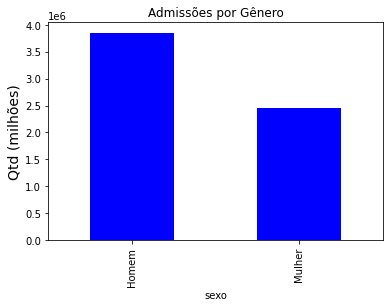

In [13]:
movimentacao.query('tipomovimentação == "Admissão"').groupby('sexo').size().sort_values(ascending=False).plot(kind='bar', color='BLUE',title = 'Admissões por Gênero').set_ylabel('Qtd (milhões)',fontsize=14),


In [14]:
movimentacao.query('tipomovimentação == "Admissão"').groupby('sexo').size().sort_values(ascending=False)


sexo
Homem     3851919
Mulher    2447509
dtype: int64

(Text(0, 0.5, 'Qtd (milhões)'),)

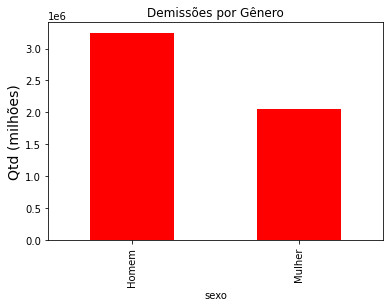

In [15]:
movimentacao.query('tipomovimentação == "Demissão"').groupby('sexo').size().sort_values(ascending=False).plot(kind='bar', color='RED',title = 'Demissões por Gênero').set_ylabel('Qtd (milhões)',fontsize=14),


In [16]:
movimentacao.query('tipomovimentação == "Demissão"').groupby('sexo').size().sort_values(ascending=False)


sexo
Homem     3246853
Mulher    2050894
dtype: int64

(Text(0, 0.5, 'Qtd'),)

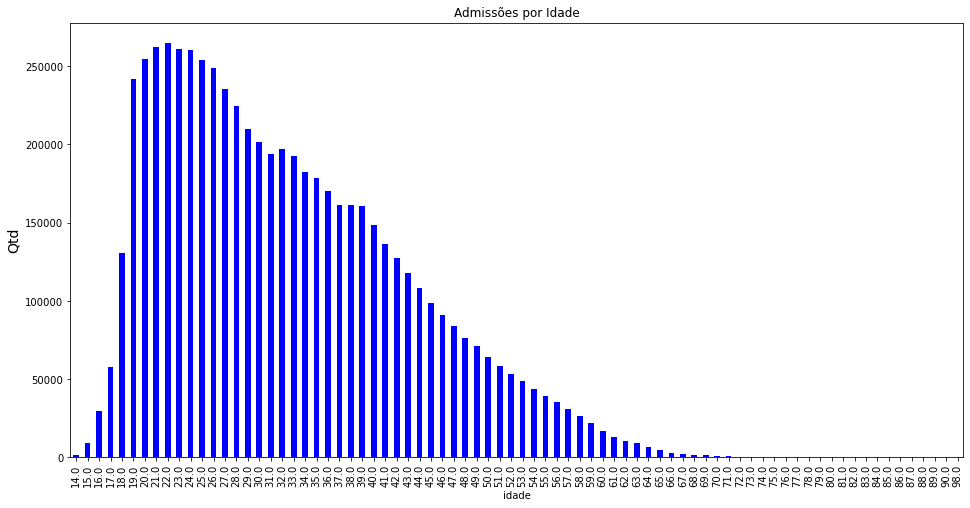

In [17]:
movimentacao.query('tipomovimentação == "Admissão"').groupby('idade').size().head(100).plot(kind='bar',figsize=(16,8), color='BLUE',title = 'Admissões por Idade').set_ylabel('Qtd',fontsize=14),


In [18]:
movimentacao.query('tipomovimentação == "Admissão"').groupby('idade').size().sort_values(ascending=False)


idade
22.0    264604
21.0    262033
23.0    260785
24.0    260242
20.0    254630
         ...  
86.0         9
90.0         8
88.0         6
89.0         5
98.0         3
Length: 78, dtype: int64

(Text(0, 0.5, 'Qtd'),)

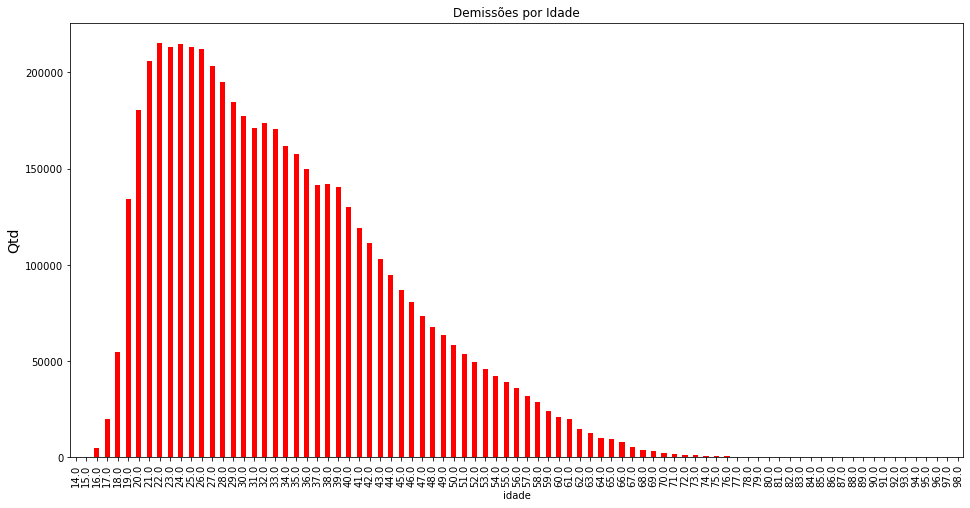

In [19]:
movimentacao.query('tipomovimentação == "Demissão"').groupby('idade').size().head(100).plot(kind='bar',figsize=(16,8), color='RED',title = 'Demissões por Idade').set_ylabel('Qtd',fontsize=14),


In [20]:
movimentacao.query('tipomovimentação == "Demissão"').groupby('idade').size().sort_values(ascending=False)


idade
22.0    215114
24.0    214808
23.0    213310
25.0    213232
26.0    212368
         ...  
95.0         5
97.0         3
98.0         2
94.0         1
96.0         1
Length: 85, dtype: int64

In [21]:
troca_escolaridade = {1:'Analfabeto', 2:'Fundamental 1 Incompleto', 3:'Fundamental 1 Completo', 4: 'Fundamental 2 Incompleto', 5: 'Fundamental 2 Completo', 6: 'Médio Incompleto', 7: 'Médio Completo', 8: 'Superior Incompleto',9: 'Superior Completo', 10:'Mestrado', 11:'Doutorado', 80:'Pós Graduado', 99:'Não Identificado'}
movimentacao['graudeinstrução'] = movimentacao['graudeinstrução'].apply(lambda x: troca_escolaridade[x])

(Text(0.5, 0, 'Qtd (milhões)'),)

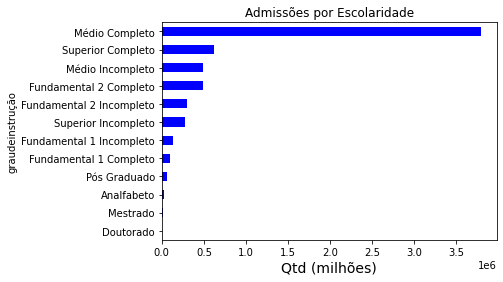

In [22]:
movimentacao.query('tipomovimentação == "Admissão"').groupby('graudeinstrução').size().sort_values().plot(kind='barh', color='BLUE',title = 'Admissões por Escolaridade').set_xlabel('Qtd (milhões)',fontsize=14),

In [23]:
movimentacao.query('tipomovimentação == "Admissão"').groupby('graudeinstrução').size().sort_values(ascending=False)

graudeinstrução
Médio Completo              3790195
Superior Completo            621820
Médio Incompleto             489548
Fundamental 2 Completo       484932
Fundamental 2 Incompleto     299228
Superior Incompleto          273278
Fundamental 1 Incompleto     128068
Fundamental 1 Completo       101716
Pós Graduado                  66976
Analfabeto                    24054
Mestrado                      14457
Doutorado                      5156
dtype: int64

(Text(0.5, 0, 'Qtd (milhões)'),)

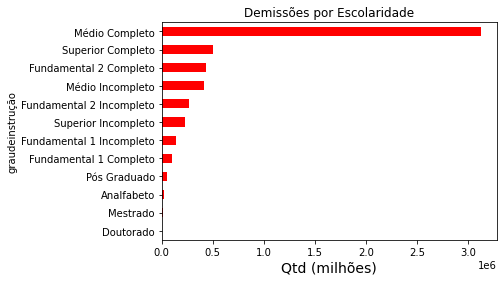

In [24]:
movimentacao.query('tipomovimentação == "Demissão"').groupby('graudeinstrução').size().sort_values().plot(kind='barh', color='RED',title = 'Demissões por Escolaridade').set_xlabel('Qtd (milhões)',fontsize=14),

In [25]:
movimentacao.query('tipomovimentação == "Demissão"').groupby('graudeinstrução').size().sort_values(ascending=False)

graudeinstrução
Médio Completo              3125755
Superior Completo            498256
Fundamental 2 Completo       432024
Médio Incompleto             414759
Fundamental 2 Incompleto     270590
Superior Incompleto          224816
Fundamental 1 Incompleto     134667
Fundamental 1 Completo       103036
Pós Graduado                  53733
Analfabeto                    26007
Mestrado                      10269
Doutorado                      3835
dtype: int64